In [22]:
# importing the required libraries
import numpy as np 
import pandas as pd
# from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
# from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
# from IPython.display import display
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import joblib
# from sklearn import metrics

In [23]:
# loading dataset
df = pd.DataFrame(pd.read_csv('F:\CUI\QRFS-FYP\QRFS-Dataset\dataset.csv'))
df = df.loc[:,["CATEGORY", "COMPLAINT"]]
df.head()

CATEGORY  \
0                   Software Issues   
1                   Hardware Issues   
2          Maintenance and Cleaning   
3  Scheduling and Management Issues   
4                   Hardware Issues   

                                           COMPLAINT  
0  My university CMS is misbehaving, it is not sh...  
1  The projector is not turning on. Nothing happe...  
2  Classroom 203 is extremely dirty, there is dus...  
3  No classroom is available at the time slot all...  
4  My university laptop is not charging. The ligh...

In [24]:
print(df.shape)
df.head(3).T

(22, 2)


0  \
CATEGORY                                     Software Issues   
COMPLAINT  My university CMS is misbehaving, it is not sh...   

                                                           1  \
CATEGORY                                     Hardware Issues   
COMPLAINT  The projector is not turning on. Nothing happe...   

                                                           2  
CATEGORY                            Maintenance and Cleaning  
COMPLAINT  Classroom 203 is extremely dirty, there is dus...

In [25]:
# finding the unique products
pd.DataFrame(df.CATEGORY.unique()).values

array([['Software Issues'],
       ['Hardware Issues'],
       ['Maintenance and Cleaning'],
       ['Scheduling and Management Issues'],
       ['Network Issues']], dtype=object)

In [26]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df.sample(100, random_state=1, replace=True).copy()
df2.head()

CATEGORY                                          COMPLAINT
5    Network Issues  The portal is very slow in loading, i have tri...
11   Network Issues  Internet wifi is down, I cannot connect to the...
12   Network Issues  The lan cable in project lab is not working, t...
8   Hardware Issues  The charging socket in my office is not workin...
9   Software Issues  The university portal does not give any respon...

In [27]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['CATEGORY'].factorize()[0]
category_id_df = df2[['CATEGORY', 'category_id']].drop_duplicates()
category_id_df

CATEGORY  category_id
5                     Network Issues            0
8                    Hardware Issues            1
9                    Software Issues            2
16          Maintenance and Cleaning            3
13  Scheduling and Management Issues            4

In [28]:
df2.head()

CATEGORY                                          COMPLAINT  \
5    Network Issues  The portal is very slow in loading, i have tri...   
11   Network Issues  Internet wifi is down, I cannot connect to the...   
12   Network Issues  The lan cable in project lab is not working, t...   
8   Hardware Issues  The charging socket in my office is not workin...   
9   Software Issues  The university portal does not give any respon...   

    category_id  
5             0  
11            0  
12            0  
8             1  
9             2

In [29]:
# New dataframe
df.head()

CATEGORY  \
0                   Software Issues   
1                   Hardware Issues   
2          Maintenance and Cleaning   
3  Scheduling and Management Issues   
4                   Hardware Issues   

                                           COMPLAINT  
0  My university CMS is misbehaving, it is not sh...  
1  The projector is not turning on. Nothing happe...  
2  Classroom 203 is extremely dirty, there is dus...  
3  No classroom is available at the time slot all...  
4  My university laptop is not charging. The ligh...

## Visualize the data

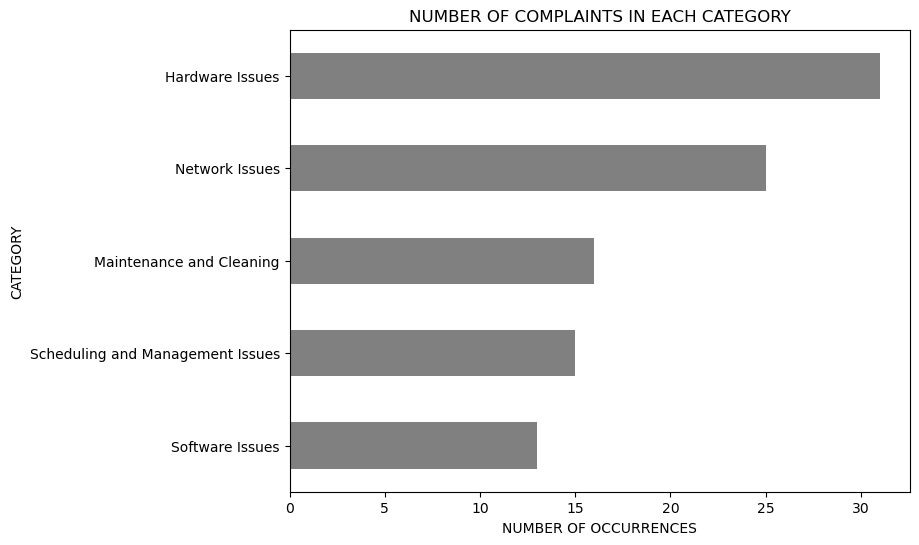

In [30]:
# Let us visualize the data, and see how many numbers of complaints are there per category. We will use Bar chart here.
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey']
df2.groupby('CATEGORY').COMPLAINT.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH CATEGORY')
plt.xlabel('NUMBER OF OCCURRENCES', fontsize = 10);

## Text Processing

#### We will transform the texts into vectors using Term Frequency-Inverse Document Frequency (TFIDF) and evaluate how important a particular word is in the collection of words. For this we need to remove punctuations and do lower casing, then the word importance is determined in terms of frequency.

#### We will be using TfidfVectorizer function with the below parameters:
* min_df: remove the words which has occurred in less than ‘min_df’ number of files.
* Sublinear_tf: if True, then scale the frequency in logarithmic scale.
* Stop_words: it removes stop words which are predefined in ‘english’.

In [31]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df2.COMPLAINT).toarray()
labels = df2.category_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 100 complaints is represented by 183 features (TF-IDF score of unigrams and bigrams)


## Splitting the dataset

#### Column ‘Complaint’ will be our X or the input and the Category is out Y or the output.

In [32]:
X = df2['COMPLAINT'] # Collection of documents
y = df2['CATEGORY'] # Target or the labels we want to predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

## Evaluation of Text Classification Model - Training the Model

In [33]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Prediction

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [35]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')

In [36]:
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [37]:
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

#### Now run the prediction

In [38]:
complaint = """the portal is stuck when I try to log in to it"""
print(model.predict(fitted_vectorizer.transform([complaint])))

['Software Issues']
